## Дополнительные функции для работы

In [1]:
def GetMode(str):
  str = str.lower()
  if str.find('stoyat') != -1:
    return 'стояние'
  if str.find('стойка') != -1:
    return 'стояние'
  if str.find('покой') != -1:
    return 'стояние'
  if str.find('на месте') != -1:
    return 'стояние'
  if str.find('стоян') != -1:
    return 'стояние'
  if str.find('стою') != -1:
    return 'стояние'
  if str.find('бег') != -1:
    return 'бег'
  if str.find('run') != -1:
    return 'бег'
  if str.find('подъ') != -1:
    return 'лестница'
  if str.find('лестниц') != -1:
    return 'лестница'
  if str.find('stairs') != -1:
    return 'лестница'
  if str.find('ходьба') != -1:
    return 'ходьба'
  if str.find('шаг') != -1:
    return 'ходьба'
  if str.find('go') != -1:
    return 'ходьба'
  if str.find('авто') != -1:
    return 'автомобиль'
  if str.find('вело') != -1:
    return 'велосипед'
  if str.find('самокат') != -1:
    return 'самокат'
  if str.find('метро') != -1:
    return 'метро'
  if str.find('скейтборд') != -1:
    return 'скейтборд'
  if str.find('машина') != -1:
    return 'автомобиль'
  return ""

In [2]:
def GetNum(str):
  if str == 'стояние':
    return 0
  if str == 'ходьба':
    return 1
  if str == 'бег':
    return 2
  if str == 'лестница':
    return 4
  if str == 'автомобиль':
    return 5
  if str == 'электро':
    return 7
  if str == 'метро':
    return 6
  if str == 'самокат':
    return 8
  if str == 'велосипед':
    return 3
  return 9

In [4]:
#считываем
import os
import pandas as pd
path = r'/content/drive/MyDrive/train'
data = {}

Data = []
Target = []
Name = []
Num = []
NumP = []
i=0
bad = 0
check = 0
cnt = 0
for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            if my_file.name.find('.xlsx') != -1:
              bad+=1
              check =1
            if my_file.name.find('.csv.txt') != -1:
              bad+=1
              check = 1
            
            try:
              if check == 0:
                df = pd.read_csv(my_file, delimiter=';')
            except Exception:
              bad+=1
            if check and df.shape[1] != 5:
                print(dir_entry_path.split("\\")[-1], df.shape)
            else:
                if check == 0 and df.shape[1] == 5 and df.columns[0] == 'time':
                  Data.append(df)
                  Target.append(dir_entry_path.split("\\")[-1])
                  Name.append(GetMode(my_file.name))
                  Num.append(GetNum(Name[len(Name) - 1]))
                  NumP.append(cnt)
                  cnt += 1
            check = 0

check = 0
for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            if my_file.name.find('.xlsx') != -1:
              bad+=1
              check = 1
            if my_file.name.find('.csv.txt') != -1:
              bad+=1
              check = 1
            try:
              if check == 0:
                df = pd.read_csv(my_file, delimiter=',')
            except Exception:
              bad+=1
            if check == 0 and df.shape[1] == 5 and df.columns[0] == 'time':
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])
                Name.append(GetMode(my_file.name))
                Num.append(GetNum(Name[len(Name) - 1]))
                NumP.append(cnt)
                cnt += 1

In [5]:
start = [x for x in range(len(Data))]
Table = pd.DataFrame(start, columns = ['Num'])

In [6]:
def GetName(x):
  return Name[x]
def GetAns(x):
  return Num[x]
Table['Name'] = Table['Num'].apply(GetName)
Table['Ans'] = Table['Num'].apply(GetAns)

In [7]:
#Сортировка по типу движения
arr = list(zip(Data, Target, Name, Num, NumP))
arr = sorted(arr, key=lambda x: x[3]) 

In [10]:
def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / numpy.linalg.norm(vec1)).reshape(3), (vec2 / numpy.linalg.norm(vec2)).reshape(3)
    v = numpy.cross(a, b)
    if any(v): #if not all zeros then 
        c = numpy.dot(a, b)
        s = numpy.linalg.norm(v)
        kmat = numpy.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
        return numpy.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))

    else:
        return numpy.eye(3) #cross of all zeros only occurs on identical directions

In [11]:
def rotate(X, Y, Z, Mat):
    new_x = []
    new_y = []
    new_z = []
    
    for elem in zip(X,Y,Z):
        res = Mat.dot(elem)
        new_x.append(res[0])
        new_y.append(res[1])
        new_z.append(res[2])
        
    return new_x, new_y, new_z

In [12]:
def integrate(lst):
    res = []
    s = 0
    for elem in lst:
        s += elem
        res.append(s)
    return res

## Рисуем графики

Populating the interactive namespace from numpy and matplotlib
/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.38.31_Митченко_велосипед.csv 7
/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.38.31_Митченко_велосипед.csv 7


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


386.7808696010863
X: 408.8844796313059
299.9201952616416
Y: 299.9201832382568
-552.4818229633211
Z: -552.4818315563994
FFT X: 0.0356938093577524 0.07779506557012669
FFT Y: 0.022289789798169164 0.06668148477439431
FFT Z: 0.04875222367367086 0.04445432318292954
DIFF: 0.011524722978951827 0.008444118569829615


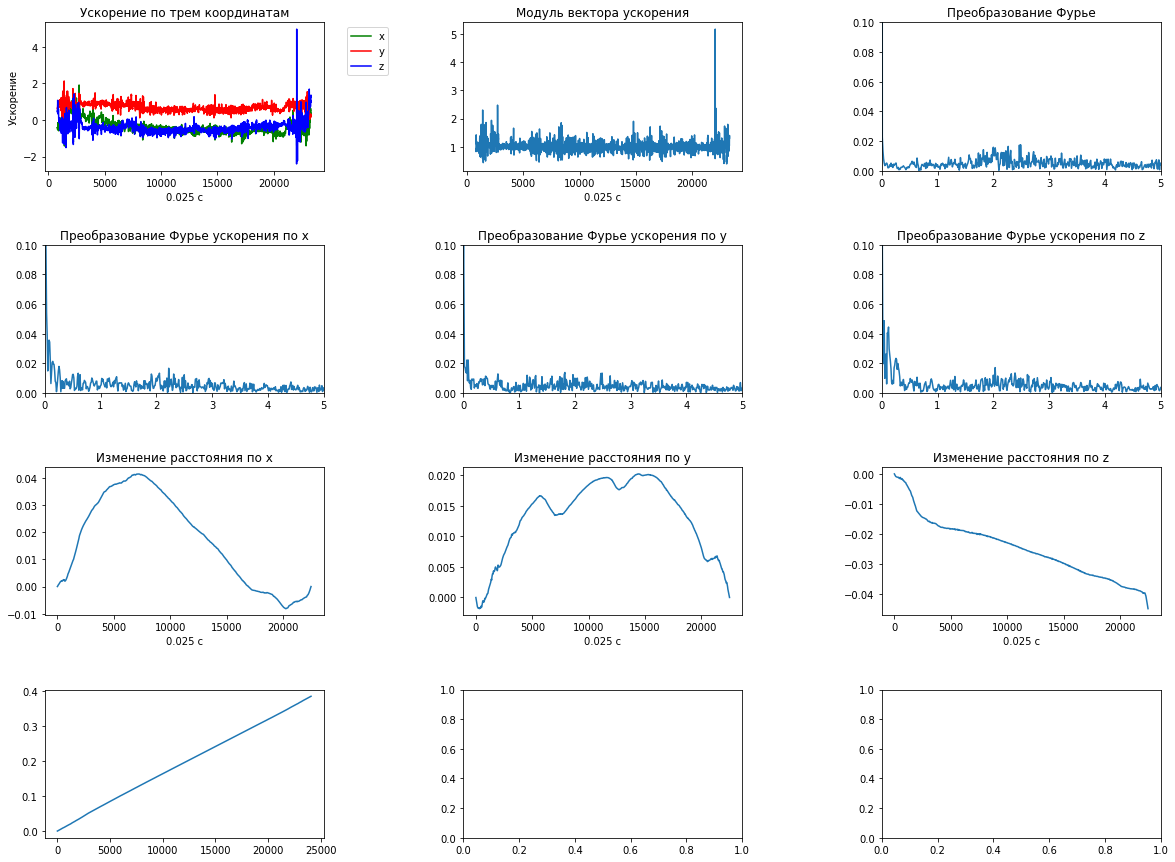

/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.38.31_Митченко_велосипед.csv Амплитуда: 4.789280950927073
/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.40.06_Митченко_велосипед.csv 8
/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.40.06_Митченко_велосипед.csv 8
60.93210053410459
X: 82.28960029009455
177.98609836318983
Y: 178.11546765159363
-552.0092818297061
Z: -552.0092920793962
FFT X: 0.05037346854198545 0.03284431793299759
FFT Y: 0.0661606592015465 0.010948105977665863
FFT Z: 0.03863549441702488 0.1204291657543245
DIFF: 0.023057110249645775 0.017478159952028886


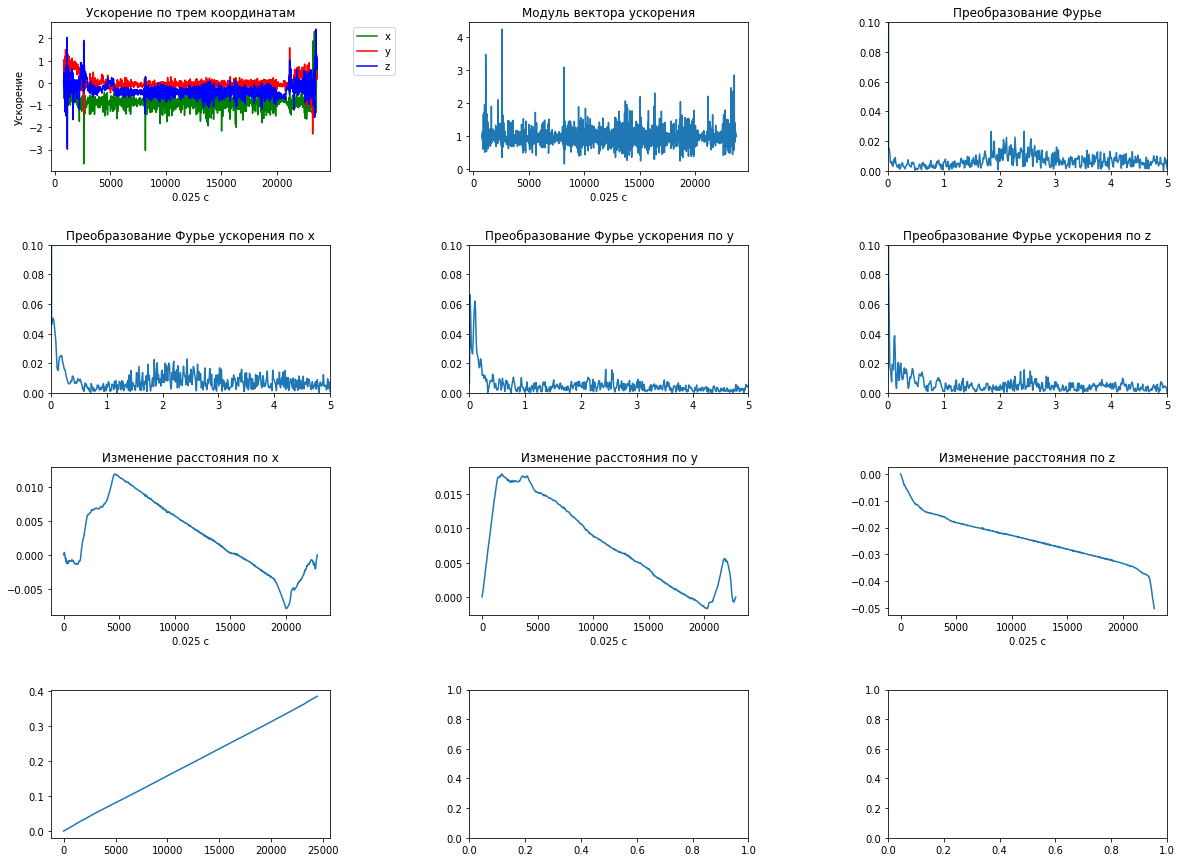

/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.40.06_Митченко_велосипед.csv Амплитуда: 4.083700574260776
/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.41.35_Митченко_велосипед.csv 9
/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.41.35_Митченко_велосипед.csv 9
-170.4831351240203
X: -173.57846306504493
32.77636600212
Y: -37.26938188733191
-20.279781586933865
Z: -46.355833069843044
FFT X: 0.03787346688395598 0.11489498598281171
FFT Y: 0.027919218549688173 0.02297899719656234
FFT Z: 0.035656144235309516 0.0804264901879682
DIFF: 0.016160129627928992 0.02178258434917272


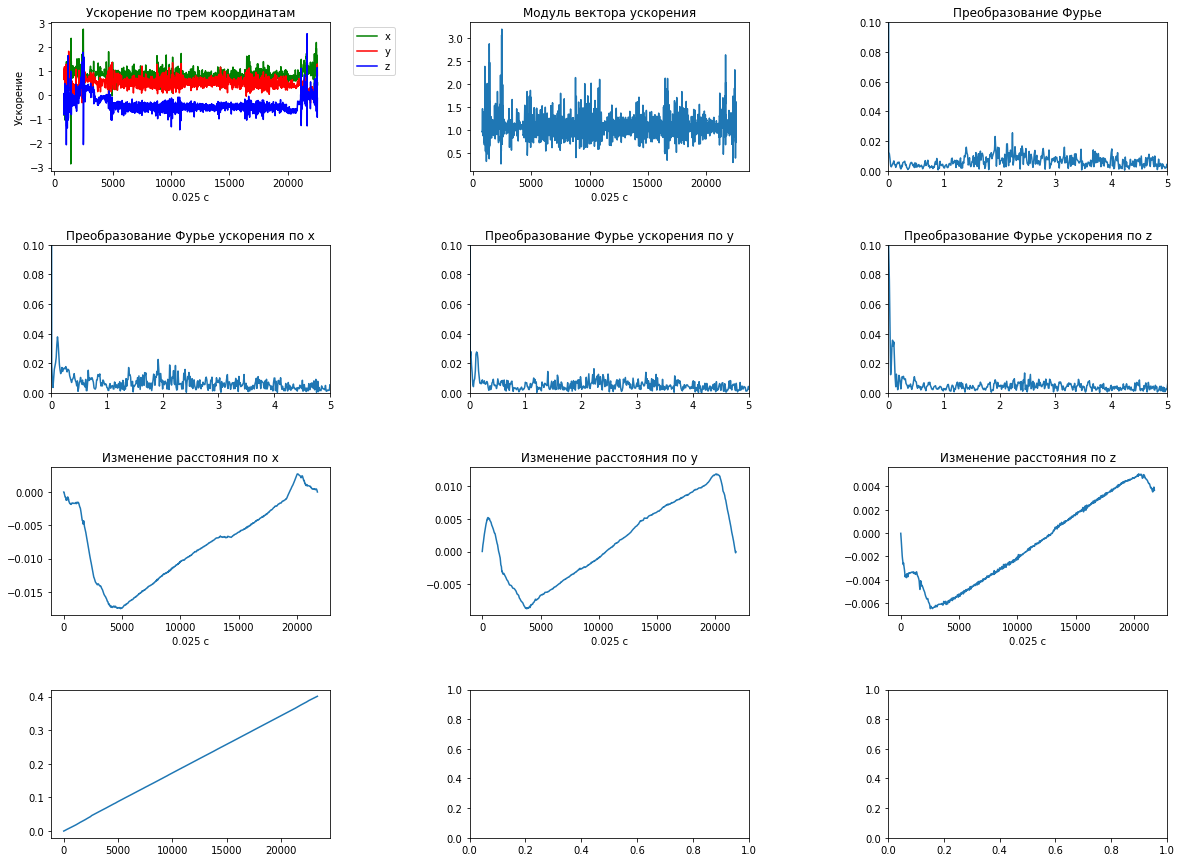

/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.41.35_Митченко_велосипед.csv Амплитуда: 2.935880284391403
/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.43.00_Митченко_велосипед.csv 10
/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.43.00_Митченко_велосипед.csv 10
-94.15852515795302
X: -100.1814441613829
-32.486553552558455
Y: -55.62204914690488
78.6423442749367
Z: 78.64233900727594
FFT X: 0.02842220560762403 1.9408848564212888
FFT Y: 0.027194138351653598 0.15199700682817321
FFT Z: 0.0380582797573966 0.10522869703488916
DIFF: 0.019210647820365002 0.010282807468587767


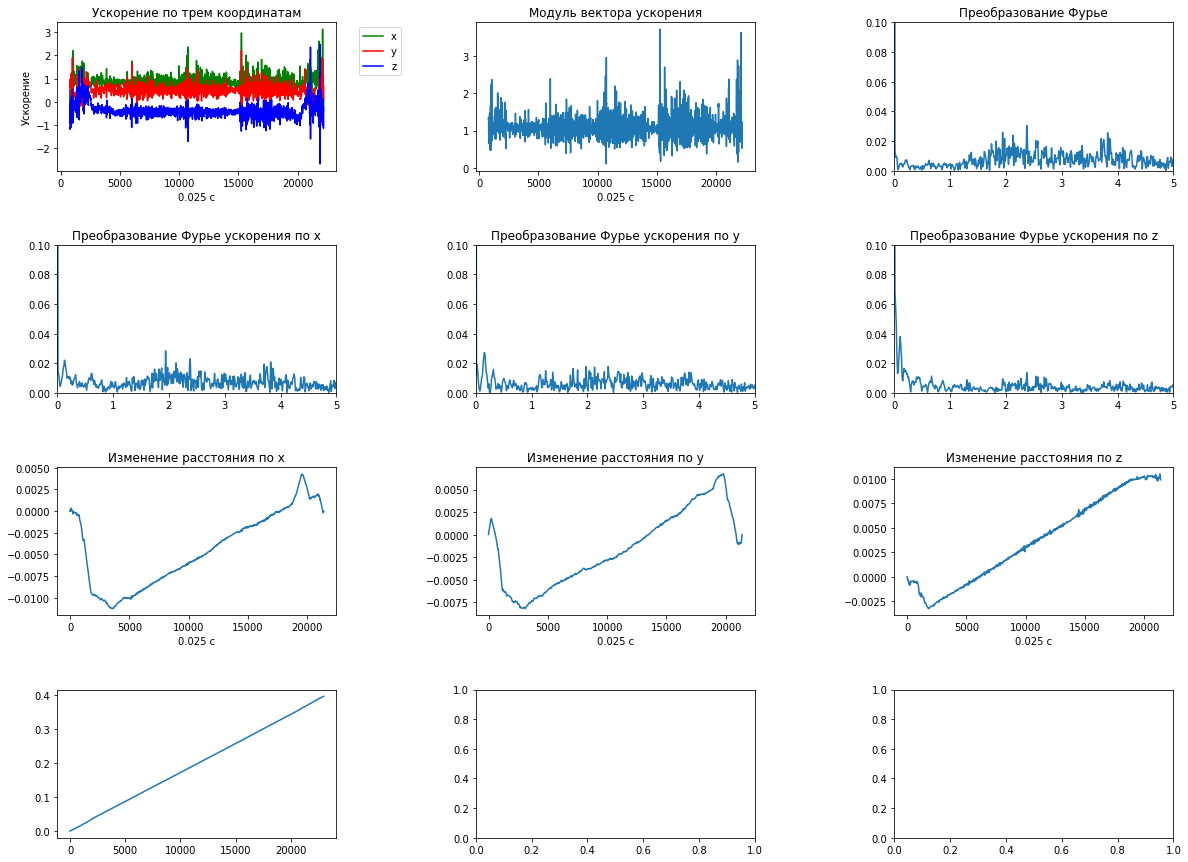

/content/drive/MyDrive/train/Анастасия Митченко - 2021-07-0413.43.00_Митченко_велосипед.csv Амплитуда: 3.6001313503195433
/content/drive/MyDrive/train/Петелин Александр - 2021-07-0419.37.45 Петелин велосипед 23
/content/drive/MyDrive/train/Петелин Александр - 2021-07-0419.37.45 Петелин велосипед 23
-200.13463467015768
X: -320.20789853541424
386.03674113274246
Y: 386.03674030650996
-1330.9348865487689
Z: -1330.9348871863942


KeyboardInterrupt: ignored

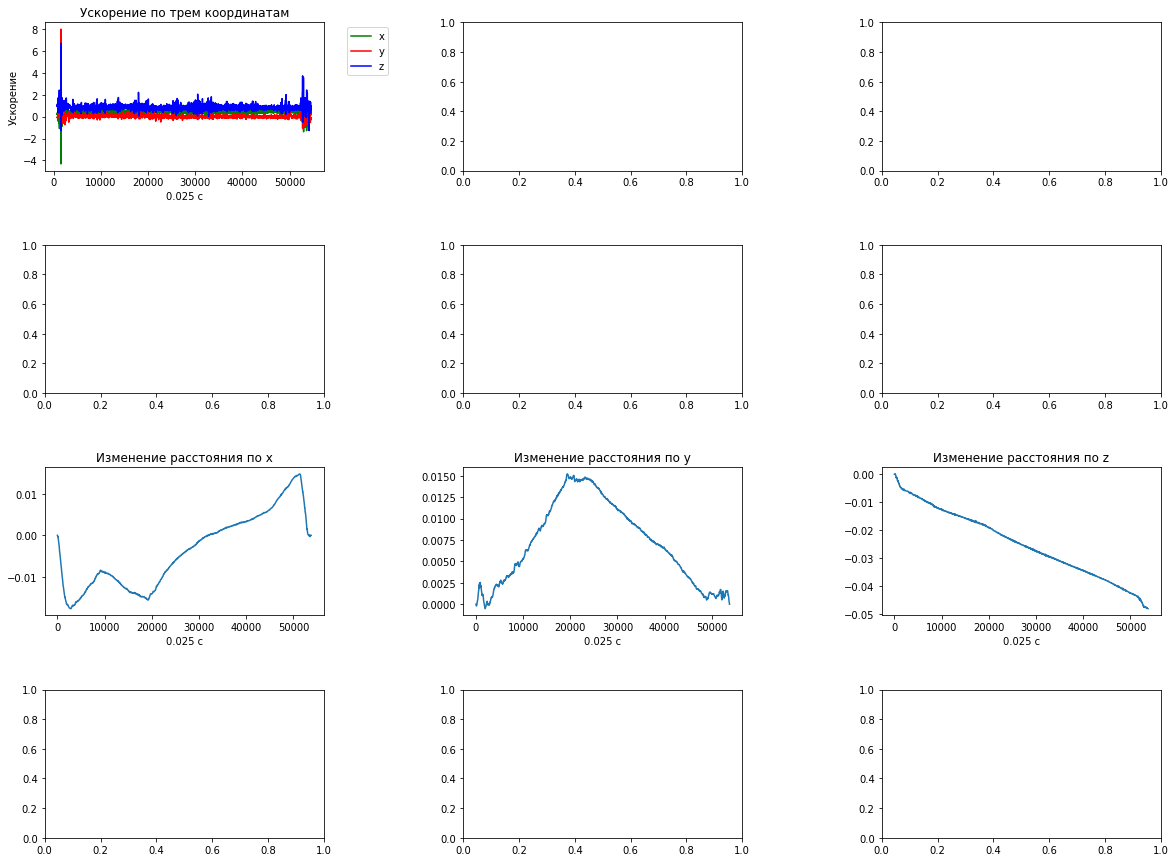

In [43]:
from scipy.signal import find_peaks
import pandas as pd
from matplotlib import pylab as plt
%pylab inline
CNT = []
def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1, place=0):
    
    print(name, place)
    
    if a == -1:
        st = 800
    else:
        st = a
            
    if b == -1:
        end = -800
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name, place)
    fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        #print(df)
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)
        try:
          df['gTotal'] = df['TgF'].astype(float)
        except Exception:
          df['gTotal'] = df['gFTotal'].astype(float)
        
    if cut:
        ax1.plot(df.iloc[st:end]['gFx'],c='g', label='x')
        ax1.plot(df.iloc[st:end]['gFy'],c='r', label='y')
        ax1.plot(df.iloc[st:end]['gFz'],c='b', label='z')
        ax1.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0.5)
        ax1.set_title('Ускорение по трем координатам')
        ax1.set_xlabel('0.025 c')
        ax1.set_ylabel('Ускорение')
    else:
        ax1.plot(df['gFx'],c='g')
        ax1.plot(df['gFy'],c='r')
        ax1.plot(df['gFz'],c='b')
#        show()
########################################################################        
#integration

#вычисляем средний вектор ускорения по треку

    mx = df.iloc[st:end]['gFx'].values.mean() 
    my = df.iloc[st:end]['gFy'].values.mean() 
    mz = df.iloc[st:end]['gFz'].values.mean() 
    
#находим матрицу поворота этого вектора к вектору (0,0,1)

    Vec = [mx,my,mz]
    Point = [0, 0, 1]
    mat = rotation_matrix_from_vectors(Vec, Point)
    
#каждую точку трека поворачиваем на эту матрицу

    new_x, new_y, new_z = rotate(df.iloc[st:end]['gFx'].values, df.iloc[st:end]['gFy'].values, df.iloc[st:end]['gFz'].values, mat)

#проверяем, что новые средние равны примерно (0,0,1). Если это не так, значит, телефон часто поворачивался при движении, и нам не поможет это преобразование

    #print('New means:', mean(new_x), mean(new_y), mean(new_z))

#делим на 250*250 (это нужно было еще при интегрировании)
    new_x = [elem / 62500 for elem in new_x]
    new_y = [elem / 62500 for elem in new_y]
#из ускорения по z вычитаем 1 (g), чтобы убрать влияние силы тяжести и оставить только ускорение по z
    new_z = [(elem-1)/62500 for elem in new_z]
    
#дважды интегрируем ускорение, чтобы получить перемещение вдоль каждой оси
    int_x = integrate(integrate(new_x))
    int_int_x = integrate(new_x)
    print(int_x[len(int_x) - 1] - int_x[0])
    ax7.plot(int_int_x)
    ax7.set_title('Изменение расстояния по x')
    ax7.set_xlabel('0.025 c')
    max_v = 0
    for i in range(len(int_x)):
      if abs(int_x[i]) > abs(int_x[max_v]):
        max_v = i
    print('X:', int_x[max_v])

    int_y = integrate(integrate(new_y))
    int_int_y = integrate(new_y)
    ax8.plot(int_int_y)
    ax8.set_title('Изменение расстояния по y')
    ax8.set_xlabel('0.025 c')
    print(int_y[len(int_y) - 1] - int_y[0])
    max_v = 0
    for i in range(len(int_y)):
      if abs(int_y[i]) > abs(int_y[max_v]):
        max_v = i
    print("Y:", int_y[max_v])

    int_z = integrate(integrate(new_z))
    int_int_z = integrate(new_z)
    ax9.plot(int_int_z)
    ax9.set_title('Изменение расстояния по z')
    ax9.set_xlabel('0.025 c')

    print(int_z[len(int_z) - 1] - int_z[0])
    max_v = 0
    for i in range(len(int_z)):
      if abs(int_z[i]) > abs(int_z[max_v]):
        max_v = i
    print("Z:", int_z[max_v])

########################################################################        
#преобразование Фурье
########################################################################        

    Fs = 250 #частота сбора данных
    y = df.iloc[st:end]['gFx'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    Min = 0
    
    ax4.plot(frq,yabs) # plotting the spectrum
    ax4.set_xlim([0,5]) #очень большие частоты нам не нужны
    ax4.set_ylim([Min,0.1]) #не смотрим на близкие к нулю величины частот
    ax4.set_title('Преобразование Фурье ускорения по x')
    h_arr = [0.1, 1.5]
    indices = find_peaks(yabs)[0]
    #if len(indices) == 0:
      #Peaks[place] = -1
    max_p = 0
    if len(indices) != 0:
      for k in range(len(indices)):
        id1 = frq[indices[k]]
        id2 = frq[indices[max_p]]
        if yabs[indices[k]] > yabs[indices[max_p]]:
          max_p = k
      print("FFT X:", yabs[indices[max_p]], frq[indices[max_p]])
    

    
    y = df.iloc[st:end]['gFy'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    ax5.plot(frq,yabs) # plotting the spectrum
    ax5.set_xlim([0,5])
    ax5.set_ylim([Min,0.1])
    ax5.set_title('Преобразование Фурье ускорения по y')
    h_arr = [0.1, 1.5]
    indices = find_peaks(yabs)[0]
    #if len(indices) == 0:
      #Peaks[place] = -1
    max_p = 0
    if len(indices) != 0:
      for k in range(len(indices)):
        id1 = frq[indices[k]]
        id2 = frq[indices[max_p]]
        if yabs[indices[k]] > yabs[indices[max_p]]:
          max_p = k
      print("FFT Y:", yabs[indices[max_p]], frq[indices[max_p]])
    


    y = df.iloc[st:end]['gFz'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
   
    ax6.plot(frq,yabs) # plotting the spectrum
    ax6.set_xlim([0,5])
    ax6.set_ylim([Min,0.1])
    ax6.set_title('Преобразование Фурье ускорения по z')
    h_arr = [0.1, 1.5]
    indices = find_peaks(yabs)[0]
    #if len(indices) == 0:
      #Peaks[place] = -1
    max_p = 0
    if len(indices) != 0:
      for k in range(len(indices)):
        id1 = frq[indices[k]]
        id2 = frq[indices[max_p]]
        if yabs[indices[k]] > yabs[indices[max_p]]:
          max_p = k
      print("FFT Z:", yabs[indices[max_p]], frq[indices[max_p]])

    
    


    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5

    y = Acc.values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    ax3.plot(frq,yabs) # plotting the spectrum
    ax3.set_xlim([0,5])
    ax3.set_ylim([Min,0.1])
    ax3.set_title('Преобразование Фурье')
    h_arr = [0.01, 1.5]
    indices = find_peaks(yabs, height=h_arr)[0]
    cnt = 1
    val_f = 0
    cnt_ans = 0
    if len(indices) > 0:
      for i in range(len(indices)):
        if (yabs[indices[i]] > val_f):
          val_f = yabs[indices[i]]
          cnt = i
      print("DIFF:",abs(val_f - yabs[indices[cnt] - 1]), abs(val_f - yabs[indices[cnt] + 1]))
    

    

    
########################################################################        
    
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    new_Acc = df.gTotal
    new_new_Acc = [elem / 62500 for elem in new_Acc]
    int_acc = integrate(new_new_Acc)
    ax2.plot(Acc)
    ax2.set_title('Модуль вектора ускорения')
    ax2.set_xlabel('0.025 c')
    ax10.plot(int_acc)
    max_p = 0
    for i in range(1, len(int_acc)):
      max_p = max(max_p, int_acc[i] / i)
    #Speed[place] = (int_acc[0] + int_acc[len(int_acc) - 1]) / 2 *(0 + len(int_acc)) / 250
    #print(Speed[place])

    #print(Acc)
    plt.show()
    h_arr = [1, 1.1]
    ind = find_peaks(Acc, height=h_arr)
    #print(ind)
    an = 100
    #for i in range(len(Acc)):
      #an = min(an, abs(Acc.[i:i], Acc[i+1:i+1]))
    print(name + ' Амплитуда:', Acc.max()-Acc.min())
    #print(an)
    return df

for i in range(len(arr)):
    a = arr[i]
    if a[3] == 3 or a[3] == 90:
      process_data(a[0], name=a[1], place=a[4])



## Выделяем признаки



In [ ]:
Peaks1 = []
Peaks5 = []
Peaks2 = []
Peaks3 = []
Cnt_P = []
Cnt_P1 = []
val_X = []
val_Y = []
val_Z = []
FFT_X = []
FFT_Y = []
FFT_Z = []
Speed = []
Diff_min = []
Diff_max = []
Ampl = []
for i in range(len(Data)):
  Ampl.append(-1)
  Peaks1.append(-1)
  Peaks5.append(-1)
  Peaks2.append(-1)
  Peaks3.append(-1)
  val_X.append(-1)
  val_Y.append(-1)
  val_Z.append(-1)
  FFT_X.append(-1)
  FFT_Y.append(-1)
  FFT_Z.append(-1)
  Speed.append(-1)
  Diff_min.append(-1)
  Diff_max.append(-1)
  Cnt_P.append(0)
  Cnt_P1.append(0)


In [ ]:
import pandas as pd
from scipy.signal import find_peaks
from matplotlib import pylab as plt
import plotly.graph_objects as go
%pylab inline

def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1, place=0):
    
    print(name)
    
    if a == -1:
        st = 800
    else:
        st = a
            
    if b == -1:
        end = -800
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name)
    #fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
    
    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        #print(df)
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)
        try:
          df['gTotal'] = df['TgF'].astype(float)
        except Exception:
          df['gTotal'] = df['gFTotal'].astype(float)
    #if cut:
        #ax1.plot(df.iloc[st:end]['gFx'],c='g')
        #ax1.plot(df.iloc[st:end]['gFy'],c='r')
        #ax1.plot(df.iloc[st:end]['gFz'],c='b')
    #else:
        #ax1.plot(df['gFx'],c='g')
        #ax1.plot(df['gFy'],c='r')
        #ax1.plot(df['gFz'],c='b')
#        show()
########################################################################        
#integration

#вычисляем средний вектор ускорения по треку

    mx = df.iloc[st:end]['gFx'].values.mean() 
    my = df.iloc[st:end]['gFy'].values.mean() 
    mz = df.iloc[st:end]['gFz'].values.mean() 
    
#находим матрицу поворота этого вектора к вектору (0,0,1)

    Vec = [mx,my,mz]
    Point = [0, 0, 1]
    mat = rotation_matrix_from_vectors(Vec, Point)
    
#каждую точку трека поворачиваем на эту матрицу

    new_x, new_y, new_z = rotate(df.iloc[st:end]['gFx'].values, df.iloc[st:end]['gFy'].values, df.iloc[st:end]['gFz'].values, mat)

#проверяем, что новые средние равны примерно (0,0,1). Если это не так, значит, телефон часто поворачивался при движении, и нам не поможет это преобразование

    #print('New means:', mean(new_x), mean(new_y), mean(new_z))

#делим на 250*250 (это нужно было еще при интегрировании)
    new_x = [elem / 62500 for elem in new_x]
    new_y = [elem / 62500 for elem in new_y]
#из ускорения по z вычитаем 1 (g), чтобы убрать влияние силы тяжести и оставить только ускорение по z
    new_z = [(elem-1)/62500 for elem in new_z]
    
#дважды интегрируем ускорение, чтобы получить перемещение вдоль каждой оси
    int_x = integrate(integrate(new_x))
    #ax7.plot(int_x)
    max_v = 0
    for i in range(len(int_x)):
      if abs(int_x[i]) > abs(int_x[max_v]):
        max_v = i
    if len(int_x) > 0:
      val_X[place] = abs(int_x[max_v])
    else:
      val_X[place] = -1

    int_y = integrate(integrate(new_y))
    #ax8.plot(int_y)
    max_v = 0
    for i in range(len(int_y)):
      if abs(int_y[i]) > abs(int_y[max_v]):
        max_v = i
    if len(int_y) > 0:
      val_Y[place] = abs(int_y[max_v])
    else:
      val_Y[place] = -1
    
    int_z = integrate(integrate(new_z))
    #ax9.plot(int_z)
    max_v = 0
    for i in range(len(int_z)):
      if abs(int_z[i]) > abs(int_z[max_v]):
        max_v = i
    if len(int_z) > 0:
      val_Z[place] = abs(int_z[max_v])
    else:
      val_Z[place] = -1


########################################################################        
#преобразование Фурье
########################################################################        

    Fs = 250 #частота сбора данных
    y = df.iloc[st:end]['gFx'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    Min = 0
    
    #ax4.plot(frq,yabs) # plotting the spectrum
    #ax4.set_xlim([0,30]) #очень большие частоты нам не нужны
    #ax4.set_ylim([Min,0.1]) #не смотрим на близкие к нулю величины частот
    indices = find_peaks(yabs)[0]
    if len(indices) == 0:
      FFT_X[place] = -1
    max_p = 0
    if len(indices) != 0:
      for k in range(len(indices)):
        if yabs[indices[k]] > yabs[indices[max_p]]:
          max_p = k
      FFT_X[place] = yabs[indices[max_p]]

    
    y = df.iloc[st:end]['gFy'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    #ax5.plot(frq,yabs) # plotting the spectrum
    #ax5.set_xlim([0,30])
    #ax5.set_ylim([Min,0.1])
    indices = find_peaks(yabs)[0]
    if len(indices) == 0:
      FFT_Y[place] = -1
    max_p = 0
    if len(indices) != 0:
      for k in range(len(indices)):
        if yabs[indices[k]] > yabs[indices[max_p]]:
          max_p = k
      FFT_Y[place] = yabs[indices[max_p]]


    y = df.iloc[st:end]['gFz'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
   
    #ax6.plot(frq,yabs) # plotting the spectrum
    #ax6.set_xlim([0,30])
    #ax6.set_ylim([Min,0.1])
    indices = find_peaks(yabs)[0]
    if len(indices) == 0:
      FFT_Z[place] = -1
    max_p = 0
    if len(indices) != 0:
      for k in range(len(indices)):
        if yabs[indices[k]] > yabs[indices[max_p]]:
          max_p = k
      FFT_Z[place] = yabs[indices[max_p]]


    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5

    y = Acc.values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    #ax3.plot(frq,yabs) # plotting the spectrum
    #ax3.set_xlim([0,5])
    #ax3.set_ylim([Min,0.1])
    max_p = 0
####Считаем пики
    h_arr = [0.01, 1.5]
    indices = find_peaks(yabs, height=h_arr)[0]
    if len(indices) == 0:
      Peaks1[place] = -1
    max_p = 0
    if len(indices) != 0:
      for k in range(len(indices)):
        if yabs[indices[k]] > yabs[indices[max_p]]:
          max_p = k
        if 0.2 <= yabs[indices[k]] < 0.5:
          Cnt_P1[place] += 1
      Peaks1[place] = yabs[indices[max_p]]
      Peaks3[place] = frq[indices[max_p]]
      cnt = 1
      val_f = 0
      cnt_ans = 0
      if len(indices) > 0:
        for i in range(len(indices)):
          if (yabs[indices[i]] > val_f):
            val_f = yabs[indices[i]]
            cnt = i
        if cnt + 1 < len(indices):
          Diff_min[place] = min(abs(val_f - yabs[indices[cnt - 1]]), abs(val_f - yabs[indices[cnt + 1]]))
          Diff_max[place] = max(abs(val_f - yabs[indices[cnt - 1]]), abs(val_f - yabs[indices[cnt + 1]]))
    
    

    h_arr = [0.05, 100]
    indices = find_peaks(yabs, height=h_arr)[0]
    if len(indices) == 0:
      Peaks5[place] = -1
    max_p = 0
    if len(indices) != 0:
      for k in range(len(indices)):
        if yabs[indices[k]] > yabs[indices[max_p]]:
          max_p = k
        if yabs[indices[k]] > 0.1:
          Cnt_P[place] += 1
      Peaks5[place] = yabs[indices[max_p]]
      #print(Peaks[place])

    h_arr = [0.05, 100]
    indices = find_peaks(yabs, height=h_arr)[0]
    if len(indices) == 0:
      Peaks2[place] = -1
    max_p = 0
    if len(indices) != 0:
      for k in range(len(indices)):
        if yabs[indices[k]] > yabs[indices[max_p]]:
          max_p = k
      Peaks2[place] = frq[indices[max_p]]

########################################################################        
    
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    Ampl[place] = Acc.max() - Acc.min()
    new_Acc = df.gTotal
    new_new_Acc = [elem / 62500 for elem in new_Acc]
    int_acc = integrate(new_new_Acc)
    #ax2.plot(Acc)
    #ax10.plot(int_acc)
    
    Speed[place] = (int_acc[0] + int_acc[len(int_acc) - 1] / 2 * len(int_acc)) / 250
    if Speed[place] is np.nan:
      Speed[place] = -1

    #ax2.plot(Acc)
    #plt.show()
    
    #print(name + ' Амплитуда:', Acc.max()-Acc.min())
    
    #return df

for i in range(len(arr)):
    a = arr[i]
    
    process_data(a[0], name=a[1], place=a[4])

Populating the interactive namespace from numpy and matplotlib
/content/drive/MyDrive/train/Ершов Иван - 2021-07-0421.24.34_Ершов_стояние_на_месте.csv
/content/drive/MyDrive/train/Ершов Иван - 2021-07-0421.24.34_Ершов_стояние_на_месте.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy



/content/drive/MyDrive/train/Петелин Александр - 2021-07-0418.40.54 Петелин стояние
/content/drive/MyDrive/train/Петелин Александр - 2021-07-0418.40.54 Петелин стояние
/content/drive/MyDrive/train/Петелин Александр - 2021-07-0418.56.22 Петелин стояние
/content/drive/MyDrive/train/Петелин Александр - 2021-07-0418.56.22 Петелин стояние
/content/drive/MyDrive/train/Петелин Александр - 2021-07-0418.59.38 Петелин стояние
/content/drive/MyDrive/train/Петелин Александр - 2021-07-0418.59.38 Петелин стояние
/content/drive/MyDrive/train/Петелин Александр - 2021-07-0419.01.15 Петелин стояние
/content/drive/MyDrive/train/Петелин Александр - 2021-07-0419.01.15 Петелин стояние
/content/drive/MyDrive/train/Артём - Прохоров стояние 1
/content/drive/MyDrive/train/Артём - Прохоров стояние 1
/content/drive/MyDrive/train/Артём - Прохоров стояние 2
/content/drive/MyDrive/train/Артём - Прохоров стояние 2
/content/drive/MyDrive/train/Артём - Прохоров стояние 3
/content/drive/MyDrive/train/Артём - Прохо

In [ ]:
def GetAmpl(x):
  return Ampl[x]
def GetPeak1(x):
  return Peaks1[x]
def GetDiffMin(x):
  return Diff_min[x]
def GetDiffMax(x):
  return Diff_max[x]
def GetSpeed(x):
  return Speed[x]
def GetCnt(x):
  return Cnt_P[x]
def GetCnt1(x):
  return Cnt_P1[x]
def GetPeak2(x):
  return Peaks2[x]
def GetPeak3(x):
  return Peaks3[x]
def GetPeak5(x):
  return Peaks5[x]
def GetX(x):
  return val_X[x]
def GetY(x):
  return val_Y[x]
def GetZ(x):
  return val_Z[x]
def GetFFTX(x):
  return FFT_X[x]
def GetFFTY(x):
  return FFT_Y[x]
def GetFFTZ(x):
  return FFT_Z[x]
Table['Ampl'] = Table['Num'].apply(GetAmpl)
Table['Peak1'] = Table['Num'].apply(GetPeak1)
Table['Peak2'] = Table['Num'].apply(GetPeak2)
Table['Peak3'] = Table['Num'].apply(GetPeak2)
Table['Peak5'] = Table['Num'].apply(GetPeak5)
Table['Max_X'] = Table['Num'].apply(GetX)
Table['Max_Y'] = Table['Num'].apply(GetY)
Table['Max_Z'] = Table['Num'].apply(GetZ)
Table['FFT_X'] = Table['Num'].apply(GetFFTX)
Table['FFT_Y'] = Table['Num'].apply(GetFFTY)
Table['FFT_Z'] = Table['Num'].apply(GetFFTZ)
Table['Speed'] = Table['Num'].apply(GetSpeed)
Table['Cnt'] = Table['Num'].apply(GetCnt)
Table['Cnt1'] = Table['Num'].apply(GetCnt1)
Table['DMin'] = Table['Num'].apply(GetDiffMin)
Table['DMax'] = Table['Num'].apply(GetDiffMax)

In [ ]:
print(Table.groupby('Ans')['Peak3'].describe())
Table[(Table.Ans == 0)].head(60)

     count      mean       std  ...       50%       75%       max
Ans                             ...                              
0    153.0 -1.000000  0.000000  ... -1.000000 -1.000000 -1.000000
1    157.0  1.598723  1.687590  ...  1.153671  2.101822  7.657658
2    127.0  2.994816  2.094775  ...  1.754386  3.714896  8.542141
3     31.0 -0.845632  0.481556  ... -1.000000 -1.000000  0.798824
4    109.0  1.417440  1.653073  ...  1.079384  2.096245  4.733995
5     37.0 -1.000000  0.000000  ... -1.000000 -1.000000 -1.000000
6      8.0 -1.000000  0.000000  ... -1.000000 -1.000000 -1.000000
8      9.0 -1.000000  0.000000  ... -1.000000 -1.000000 -1.000000
9      9.0 -1.000000  0.000000  ... -1.000000 -1.000000 -1.000000

[9 rows x 8 columns]


,Num,Name,Ans,Ampl,Peak1,Peak2,Peak5,Max_X,Max_Y,Max_Z,FFT_X,FFT_Y,FFT_Z,Pred,Speed,Cnt,Cnt1,Peak3,DMin,DMax
1,1,стояние,0,0.066701,-1.000000,-1.0,-1.0,3.730957,12.571841,14.029633,0.002035,0.000673,0.002197,0,4.625973,0,0,-1.0,-1.000000,-1.000000
11,11,стояние,0,1.357087,-1.000000,-1.0,-1.0,165.913949,97.831089,36.297243,0.007379,0.029520,0.074165,0,6.616181,0,0,-1.0,-1.000000,-1.000000
16,16,стояние,0,0.118845,-1.000000,-1.0,-1.0,23.203431,35.645935,46.577661,0.001985,0.001351,0.006042,0,3.965672,0,0,-1.0,-1.000000,-1.000000
17,17,стояние,0,0.107026,-1.000000,-1.0,-1.0,62.274704,32.504305,117.294865,0.003006,0.001997,0.005931,0,8.153623,0,0,-1.0,-1.000000,-1.000000
18,18,стояние,0,0.100159,-1.000000,-1.0,-1.0,54.010840,30.334842,111.538719,0.003301,0.002324,0.001902,0,12.932503,0,0,-1.0,-1.000000,-1.000000
32,32,стояние,0,0.178771,-1.000000,-1.0,-1.0,0.931544,12.119984,7.161230,0.000889,0.001080,0.001265,0,2.275407,0,0,-1.0,-1.000000,-1.000000
33,33,стояние,0,0.088242,-1.000000,-1.0,-1.0,4.579730,9.604058,2.820606,0.001119,0.000527,0.001839,0,2.253071,0,0,-1.0,-1.000000,-1.000000
34,34,стояние,0,0.090440,-1.000000,-1.0,-1.0,11.748197,9.098178,7.666500,0.002275,0.001568,0.001532,0,2.370105,0,0,-1.0,-1.000000,-1.000000
35,35,стояние,0,0.078368,-1.000000,-1.0,-1.0,2.690615,0.428728,3.979604,0.000871,0.000955,0.001267,0,2.079901,0,0,-1.0,-1.000000,-1.000000
36,36,стояние,0,0.018033,-1.000000,-1.0,-1.0,0.825101,2.081170,12.373439,0.001166,0.000533,0.000255,0,1.796783,0,0,-1.0,-1.000000,-1.000000


## Делаем придсказание

In [ ]:
def get_prediction(x):
    if x.Ampl < 1 and x.Peak1 == -1:
        return 0 #стояние
    if x.Peak1 == -1:
      return 0
    if x.Ampl < 4 and x.Peak5 < 0.2 and x.Cnt == 2:
      return 1
    if x.Ampl < 5 and x.Peak5 < 0.16 and x.Cnt == 2:
      return 1
    
    #if x.Cnt1 == 4:
      #return 1

    if x.Cnt > 1:
      return 2
    if x.Cnt > 3 and  x.Peak2 >= 1:
      return 2
    if x.Cnt > 1 and (x.Ampl > 3 and x.Peak2 > 1.5) and x.Speed > 1 and x.Peak5 != -1:
      return 2
    
    

    if x.Cnt > 1 and ((x. Ampl > 4 and x.Peak5 > 0.2) and (x.Peak5 > 0.2 and x.Peak2 > 2)) and (x.Peak5 != -1):
        return 2 #бег
    
    if ((x.Peak5 == -1) or (x.Peak2 > 3)) and (x.Peak1 < 0.05):
      return 3
    else:
      #if  x.Speed > 18:
        #return 3
      if (max(abs(x.Max_X - x.Max_Y), abs(x.Max_X - x.Max_Z), abs(x.Max_Z - x.Max_Y)) > 100):
          return 1
      if min(abs(x.FFT_X - x.FFT_Y), abs(x.FFT_X - x.FFT_Z), abs(x.FFT_Z - x.FFT_Y)) < 0.04:
        return 1
      else:
        return 1

In [ ]:
Table['Pred'] = Table.apply(get_prediction, axis=1)

## Анализируем плохие случаи

In [ ]:
Table.groupby('Ans')['Cnt1'].describe()

,count,mean,std,min,25%,50%,75%,max
Ans,,,,,,,,
0,153.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,157.0,12.356688,14.491825,0.0,4.0,6.0,15.0,62.0
2,127.0,76.094488,54.412072,12.0,39.0,64.0,96.5,317.0
3,31.0,1.354839,2.550142,0.0,0.0,0.0,2.0,10.0
4,109.0,9.752294,16.655083,0.0,4.0,6.0,10.0,153.0
5,37.0,0.054054,0.328798,0.0,0.0,0.0,0.0,2.0
6,8.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,9.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,9.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
Table_n = Table[(Table['Ans'] < 3) & (Table.Cnt1 < 4)]
Table_n

,Num,Name,Ans,Ampl,Peak1,Peak2,Peak5,Max_X,Max_Y,Max_Z,FFT_X,FFT_Y,FFT_Z,Pred,Speed,Cnt,Cnt1,Peak3,DMin,DMax
1,1,стояние,0,0.066701,-1.000000,-1.000000,-1.000000,3.730957,12.571841,14.029633,0.002035,0.000673,0.002197,0,4.625973,0,0,-1.000000,-1.000000,-1.000000
6,6,ходьба,1,2.156042,0.159999,1.107041,0.159999,11.615785,157.417478,302.961361,0.042379,0.137701,0.061233,1,3.237512,3,2,1.107041,0.141369,0.144085
11,11,стояние,0,1.357087,-1.000000,-1.000000,-1.000000,165.913949,97.831089,36.297243,0.007379,0.029520,0.074165,0,6.616181,0,0,-1.000000,-1.000000,-1.000000
16,16,стояние,0,0.118845,-1.000000,-1.000000,-1.000000,23.203431,35.645935,46.577661,0.001985,0.001351,0.006042,0,3.965672,0,0,-1.000000,-1.000000,-1.000000
17,17,стояние,0,0.107026,-1.000000,-1.000000,-1.000000,62.274704,32.504305,117.294865,0.003006,0.001997,0.005931,0,8.153623,0,0,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,623,ходьба,1,2.320845,0.114422,4.574742,0.114422,3.984637,6.335441,15.819087,0.056317,0.107664,0.048116,1,0.249881,3,2,4.574742,0.085646,0.094930
624,624,ходьба,1,0.003737,-1.000000,-1.000000,-1.000000,0.005900,0.047765,0.085828,0.000483,0.001177,0.001171,0,0.055064,0,0,-1.000000,-1.000000,-1.000000
629,629,стояние,0,0.107315,-1.000000,-1.000000,-1.000000,0.147091,0.091001,0.246324,0.003937,0.005397,0.001575,0,0.159415,0,0,-1.000000,-1.000000,-1.000000
630,630,стояние,0,0.103710,-1.000000,-1.000000,-1.000000,0.750677,0.239008,0.060825,0.015333,0.017221,0.002575,0,0.133479,0,0,-1.000000,-1.000000,-1.000000


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Table['Ans'], Table['Pred']))
print(len(Table[(Table['Ans'] == 0) & (Table['Pred'] != 0)]) / len(Table[(Table['Ans'] == 0)]))
print(len(Table[(Table['Ans'] == 1) & (Table['Pred'] != 1)]) / len(Table[(Table['Ans'] == 1)]))
print(len(Table[(Table['Ans'] == 2) & (Table['Pred'] != 2)]) / len(Table[(Table['Ans'] == 2)]))
print(len(Table[(Table['Ans'] == 3) & (Table['Pred'] != 3)]) / len(Table[(Table['Ans'] == 3)]))
print(len(Table[(Table['Ans'] == 4) & (Table['Pred'] != 4)]) / len(Table[(Table['Ans'] == 4)]))

Table_n = Table[(Table['Ans'] == 2) & (Table['Pred'] != 2)]
#print(Table_n.count(), Table.groupby('Ans')['Num'].count())
Table_n

0.659375
0.032679738562091505
0.17197452229299362
0.06299212598425197
0.1935483870967742
1.0


,Num,Name,Ans,Ampl,Peak1,Peak2,Peak5,Max_X,Max_Y,Max_Z,FFT_X,FFT_Y,FFT_Z,Pred,Speed,Cnt,Cnt1,Peak3,DMin,DMax
65,65,бег,2,3.104558,0.257540,3.630588,0.257540,0.368609,0.212769,108.328509,0.094302,0.363024,0.103764,1,4.430704,1,1,3.630588,0.175564,0.216475
66,66,бег,2,3.104558,0.257540,3.630588,0.257540,0.368609,0.212769,108.328509,0.094302,0.363024,0.103764,1,4.430704,1,1,3.630588,0.175564,0.216475
233,233,бег,2,2.928145,0.430110,6.318306,0.430110,1.260179,3.840406,2.819602,0.077597,0.325432,0.316256,1,0.700252,1,1,6.318306,0.371342,0.404390
314,314,бег,2,4.300026,0.179432,1.774909,0.179432,185.820083,112.686353,83.582035,0.235495,0.171626,0.099637,1,7.426881,1,0,1.774909,0.125841,0.130643
349,349,бег,2,3.786577,0.199639,3.426071,0.199639,7.201495,25.026865,10.372384,0.101023,0.131060,0.227013,1,7.276275,2,0,3.426071,0.115400,0.162102
367,367,бег,2,5.077234,0.115935,1.340717,0.115935,181.412166,221.195387,39.804290,0.150557,0.107605,0.051283,1,13.995613,1,0,1.340717,0.032741,0.037354
368,368,бег,2,8.335847,0.147283,1.336758,0.147283,347.639217,594.376284,27.391231,0.171959,0.074042,0.039520,1,17.224075,1,0,1.336758,0.050738,0.051579
597,597,бег,2,3.662308,0.439444,5.645505,0.439444,0.808577,0.098725,0.578462,0.416399,0.126830,0.105250,1,0.529907,1,1,5.645505,0.397160,0.407156


In [ ]:
Table[(Table.Ans != 1) & (Table.Cnt == 1)]

,Num,Name,Ans,Ampl,Peak1,Peak2,Peak5,Max_X,Max_Y,Max_Z,FFT_X,FFT_Y,FFT_Z,Pred,Speed,Cnt,Cnt1,Peak3,DMin,DMax


In [ ]:
Table[(Table.Ans == 2) & (Table.Cnt == 2)]

,Num,Name,Ans,Ampl,Peak1,Peak2,Peak5,Max_X,Max_Y,Max_Z,FFT_X,FFT_Y,FFT_Z,Pred,Speed,Cnt,Cnt1,Peak3
93,93,бег,2,10.032332,0.378734,0.803026,0.378734,375.196614,524.516118,137.809875,0.323591,0.178621,0.138405,1,15.964947,2,17,0.803026
144,144,бег,2,6.306885,0.509785,1.420347,0.509785,27.954152,6.043402,16.981787,0.379913,0.406111,0.227018,2,2.090647,2,15,1.420347
195,195,бег,2,3.269053,0.360393,3.636703,0.360393,0.788071,0.563372,39.510964,0.092304,0.484722,0.189228,2,0.478451,2,9,3.636703
201,201,бег,2,5.074737,0.309818,3.443369,0.309818,0.900978,1.447316,57.045922,0.129745,0.410034,0.108898,2,1.208221,2,26,3.443369
207,207,бег,2,4.977758,0.269808,3.238411,0.269808,6.028972,20.252736,46.955905,0.050207,0.306565,0.045083,2,1.194574,2,22,3.238411
338,338,бег,2,6.294072,0.198519,2.450252,0.198519,23.683587,56.912948,6.479019,0.043473,0.247236,0.093274,2,2.173395,2,6,2.450252
348,348,бег,2,3.941231,0.233494,3.516029,0.233494,6.257686,15.135747,10.902891,0.134265,0.135631,0.278051,2,1.293211,2,13,3.516029
349,349,бег,2,3.786577,0.199639,3.426071,0.199639,7.201495,25.026865,10.372384,0.101023,0.131060,0.227013,1,1.819069,2,7,3.426071
350,350,бег,2,4.895522,0.260283,3.370787,0.260283,10.868566,24.177421,19.564291,0.137414,0.126405,0.337974,2,2.465404,2,12,3.370787
434,434,бег,2,4.109210,0.234037,2.706639,0.234037,60.919763,26.344970,115.714026,0.200979,0.137732,0.259792,2,4.050003,2,8,2.706639
